# Contrôle de la source de courant (HMP Rohde&Schwarz)

In [8]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [16]:
from scipy.ndimage import gaussian_filter1d as gf1

In [1]:
import pyvisa
rm = pyvisa.ResourceManager()
hmp=rm.open_resource('ASRL5::INSTR')

In [43]:
# Check connection
hmp.query('*IDN?')

'ROHDE&SCHWARZ,HMP4030,101129,HW50020003/SW2.72\n'

## Modifie la valeur du courant

In [44]:
current = 9
hmp.write(f'SOUR:CURR {current}')

13

In [4]:
current = 0.0
hmp.write(f'SOUR:CURR {current}')

15

# Connexion au lock-in

In [5]:
import zhinst.core
daq = zhinst.core.ziDAQServer("localhost", 8005, 1)

In [6]:
# Vérifie la connexion au device
device_id = "dev712" 
c = daq.connectDevice(device_id, "1gbe")
c or "Ok" 

'Ok'

## Récupération des quadratures $X$ et $Y$ point par point

In [52]:
channel = 0
sample_path = f"/{device_id}/demods/{channel}/sample"
courant = np.arange(6.0,7.5,0.005)
Npts = len(courant)
X = np.zeros(Npts)
Y = np.zeros(Npts)

for i in range(Npts):
    hmp.write(f'SOUR:CURR {courant[i]}')
    time.sleep(0.1)
    # Acquire data
    data = daq.getSample(sample_path)
    X[i] = data['x'][0]
    Y[i] = data['y'][0]
hmp.write(f'SOUR:CURR {courant[0]}')

15

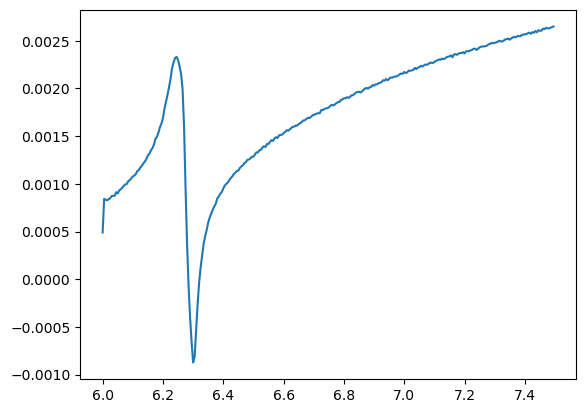

In [53]:
plt.plot(courant,X)


In [54]:
import h5py
with h5py.File("balayage_I_freq1_2.hdf5", "w") as f:
    f.create_dataset("courant", data=  courant)
    f.create_dataset("X", data= X)
    f.create_dataset("Y", data= Y)

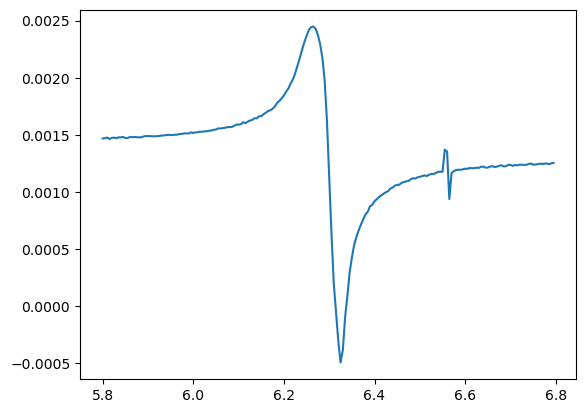

In [34]:
plt.plot(courant,X)